In [2]:
import numpy as np
from numpy.linalg import inv
from linearRegression import *
import matplotlib.pyplot as plt

In [3]:
X_train = np.array([2.5, 4.7, 5.2, 7.3, 9.5, 11.5]).reshape((6,1))
Y_train = np.array([5.21, 7.70, 8.30, 11, 14.5, 15])
X_test = np.array([3.5,5,6,8,10])

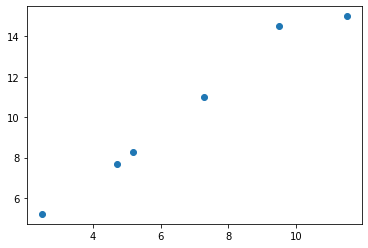

In [4]:
plt.scatter(X_train,Y_train)
plt.show()

# <u> Q1. No Regularization

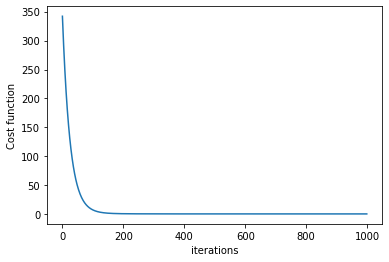

In [4]:
theta = fitGD(X_train,Y_train,0.00589,0.00589,0,1000)


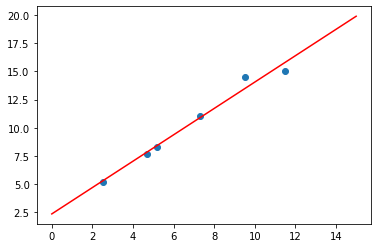

In [5]:
t = np.linspace(0,15,100)
plt.scatter(X_train,Y_train)
y = theta[1,0]*t + theta[0,0]
plt.plot(t, y, '-r')
plt.show()

In [6]:
yTest = theta[1,0]*X_test+ theta[0,0]
yTest

array([ 6.44738414,  8.20011777,  9.36860686, 11.70558504, 14.04256322])

# <u> Q1.Ridge Regression

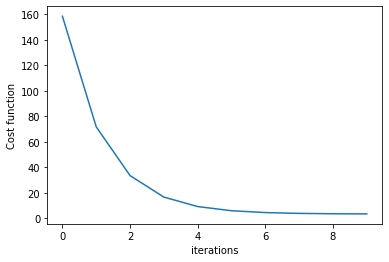

In [7]:
theta1 = fitGD(X_train,Y_train,0.001,0.01,1,10)

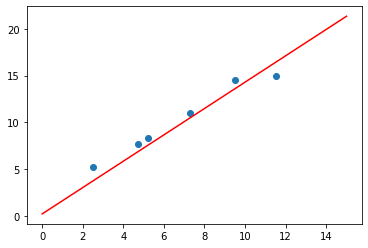

In [8]:
t = np.linspace(0,15,100)
plt.scatter(X_train,Y_train)
y = theta1[1,0]*t + theta1[0,0]
plt.plot(t, y, '-r')
plt.show()

In [9]:
yTest1 = theta1[1,0]*X_test+ theta1[0,0]
yTest1

array([ 5.13311151,  7.24917866,  8.6598901 , 11.48131296, 14.30273583])

# <u> Q1.Lasso Regression

c:\Users\hp\OneDrive - IIT Kanpur\Winter-Project-ML-Che\210079_Ajitesh Shree\Assignment_1\linearRegression.py:57: RuntimeWarning: invalid value encountered in divide
  mod = theta/abs(theta)


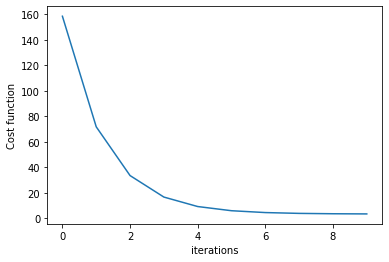

In [10]:
theta2 = fitGD(X_train,Y_train,0.001,0.1,2,10)

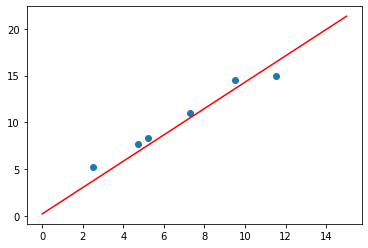

In [11]:
t = np.linspace(0,15,100)
plt.scatter(X_train,Y_train)
y = theta2[1,0]*t + theta2[0,0]
plt.plot(t, y, '-r')
plt.show()

In [12]:
yTest2 = theta2[1,0]*X_test+ theta2[0,0]
yTest2

array([ 5.13164852,  7.24743498,  8.65795929, 11.4790079 , 14.30005652])

# <u>Q2. Normal Equations

In [13]:
theta3 = fitNormal(X_train,Y_train)

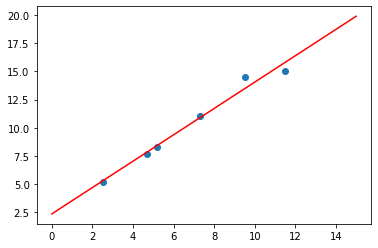

In [14]:
t = np.linspace(0,15,100)
plt.scatter(X_train,Y_train)
y = theta3[1,0]*t + theta3[0,0]
plt.plot(t, y, '-r')
plt.show()

In [15]:
yTest3 = theta3[1,0]*X_test+ theta3[0,0]
yTest3

array([ 6.45112002,  8.20263879,  9.37031797, 11.70567634, 14.0410347 ])

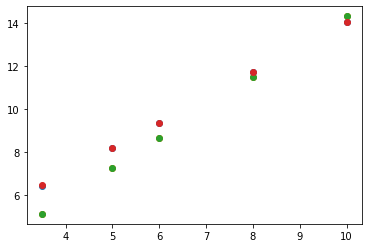

In [16]:
plt.scatter(X_test,yTest)
plt.scatter(X_test,yTest1)
plt.scatter(X_test,yTest2)
plt.scatter(X_test,yTest3)
plt.show()

# <u>Q3. Locally Weighted Linear Regression

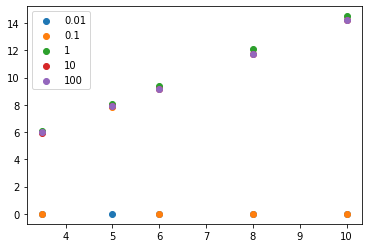

In [13]:
taus = [0.01,0.1,1,10,100]
x = X_test.reshape(5,1)
for tau in taus:
    yTest4 = locallyWeighed(X_train,Y_train,x,0.001,tau,1000)
    plt.scatter(X_test,yTest4, label = tau)
plt.legend()
plt.show()

# <u>Error analysis:

In [5]:
solution = np.array([6.25, 8.2, 9.5, 12.1, 14.7])

In [6]:
def error(y, yPred):
    ev = y - yPred
    error = 0
    for ele in ev:
        error = error + ele*ele
    return error/(2*(ev.shape[0]))
    # return ((y - yPred)**2)/2*(y.shape[0])

<H4><u>Ridge Error

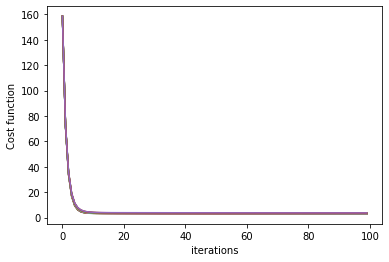

In [7]:
jTrain = []
jTest =[]
t = X_train.reshape((6))

for lam in np.arange(1,16):
    theta = fitGD(X_train,Y_train,0.001,lam,1,100)
    yTrain = theta[1,0]*t+ theta[0,0]
    jTrain.append(error(yTrain,Y_train))
    what = theta[1,0]*X_test+ theta[0,0]
    jTest.append(error(what,solution))

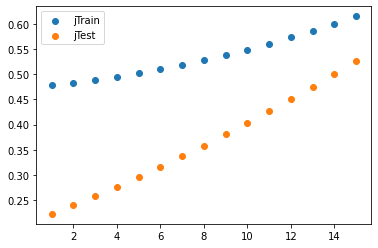

In [8]:
plt.scatter(np.arange(1,16),jTrain, label = 'jTrain')
plt.scatter(np.arange(1,16),jTest, label = 'jTest')
plt.legend()
plt.show()

<H4><u>Lasso Error

c:\Users\hp\OneDrive - IIT Kanpur\Winter-Project-ML-Che\210079_Ajitesh Shree\Assignment_1\linearRegression.py:57: RuntimeWarning: invalid value encountered in divide
  mod = theta/abs(theta)


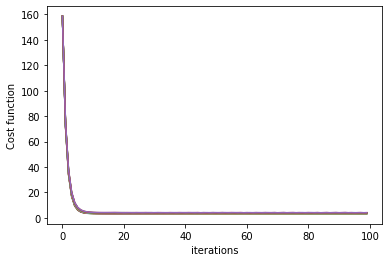

In [9]:
jTrain = []
jTest =[]
t = X_train.reshape((6))

for lam in np.arange(1,16):
    theta = fitGD(X_train,Y_train,0.001,lam,2,100)
    yTrain = theta[1,0]*t+ theta[0,0]
    jTrain.append(error(yTrain,Y_train))
    what = theta[1,0]*X_test+ theta[0,0]
    jTest.append(error(what,solution))

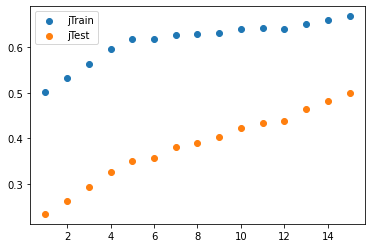

In [10]:
plt.scatter(np.arange(1,16),jTrain, label = 'jTrain')
plt.scatter(np.arange(1,16),jTest, label = 'jTest')
plt.legend()
plt.show()

<h4><u>Locally Weighted Error

In [14]:
jTrain = []
jTest =[]
taus = np.array([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
for tau in taus:
    yTrain = locallyWeighed(X_train,Y_train,X_train,0.001,tau,100).reshape((6))
    jTrain.append(error(yTrain,Y_train))
    what = locallyWeighed(X_train,Y_train,x,0.001,tau,100).reshape((5))
    jTest.append(error(what,solution))

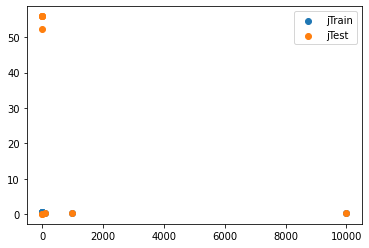

In [15]:
plt.scatter(taus,jTrain, label = 'jTrain')
plt.scatter(taus,jTest, label = 'jTest')
plt.legend()
plt.show()